# Generating Plots for the Paper

In [1]:
kwargs = {
    'sym' : '',
    'whis' : [5,95]
}

figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

labels = ['Edit', 'Resistance', 'DeltaCon', 'NetSimile', 'Lambda (A)',
          'Lambda (L)', 'Lambda (NL)']

# Functions for Plotting

These functions plot our data, starting with a pickled data dictionary.

In [47]:
def plot(path,title='',save=False,filename=None):
    """Plots data contained in data dictionary, for matrix and spectral distances.
    
    If save = True, then a filename must be provided
    
    Data unpacking is based on particular data format, see scripts in data_scripts 
    directory for examples.
    """

    data_dict = pd.read_pickle(path)

    adj_null = data_dict['results_df_null']['Adjacency Distances'].T
    adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

    for item in [adj_null,adj_not]:
        item.index = range(item.shape[0])

    adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

    plt.figure(figsize=(6,4))
    adj_scaled.boxplot(**kwargs);
    plt.ylabel('Scaled Distance $\widehat{D}_2$');
    plt.xticks(range(1,len(labels)+1),labels,rotation=90);
    plt.title(title);

    if save_figs:
        fig = plt.gcf();
        fig.savefig(os.path.join(figures_dir,filename),dpi=300,bbox_inches='tight');

def plot_lambda_k(path,k_list,title='',scale=1,shift=-0.07,figsize=(6,4),
                  save=False,filename=None,y_lim=None):

    data_dict = pd.read_pickle(path)

    adj_null = data_dict['results_df_null']['Adjacency Distances'].T
    adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

    for item in [adj_null,adj_not]:
        item.index = range(item.shape[0])

    adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

    N = len(adj_scaled.columns)

    indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
    adj_scaled = adj_scaled.iloc[:,indices]

    # we don't need k = 1 for Laplacian distances
    del adj_scaled['Lambda (Laplacian, k=1)']
    del adj_scaled['Lambda (Normalized Laplacian, k=1)']

    m = len(k_list)

    # we don't need k = 1 for Laplacian distances
    num_labels = k_list + k_list[1:] * 2

    plt.figure(figsize=figsize);
    adj_scaled.boxplot(**kwargs);
    plt.ylabel('Scaled Distance $\widehat{D}_2$');
    plt.xlabel('Number of Eigenvalues $k$')
    plt.xticks(range(1,len(num_labels)+1),num_labels);
    plt.title(title);
    plt.axvline(m + 0.5);
    plt.axvline(2*m - 0.5);

    axes = plt.gca()
    y_min,y_max = axes.get_ylim()
    scale = 1.1
    y_max = y_max*scale
    if y_lim is not None:
        y_min,y_max = y_lim
    y_ran = y_max - y_min
    shift = -0.07
    plt.ylim([y_min,y_max])

    plt.text(m/2 + 1, y_max + shift*y_ran, 'Lambda(A)', horizontalalignment='center')
    plt.text(3/2*m, y_max + shift*y_ran, 'Lambda(L)', horizontalalignment='center')
    plt.text(5/2*m - 1, y_max + shift*y_ran, 'Lambda(NL)', horizontalalignment='center')

    if save:
        fig = plt.gcf();
        fig.savefig(os.path.join(figures_dir,filename),dpi=300,bbox_inches='tight');

## Stochastic Blockmodel

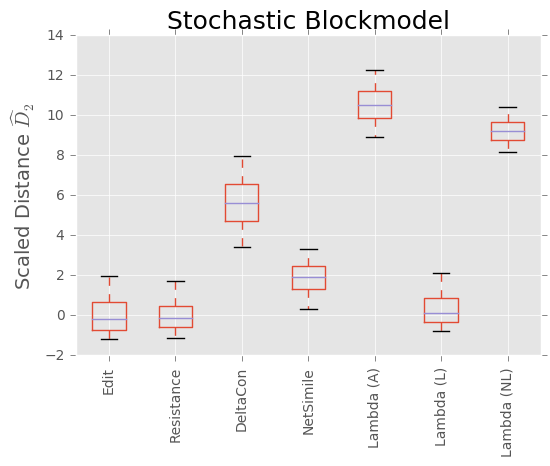

In [2]:
data_dict = pd.read_pickle('pickled_data/er_to_sbm_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Stochastic Blockmodel');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'sbm.pdf'),dpi=300,bbox_inches='tight');

## SBM 3-community

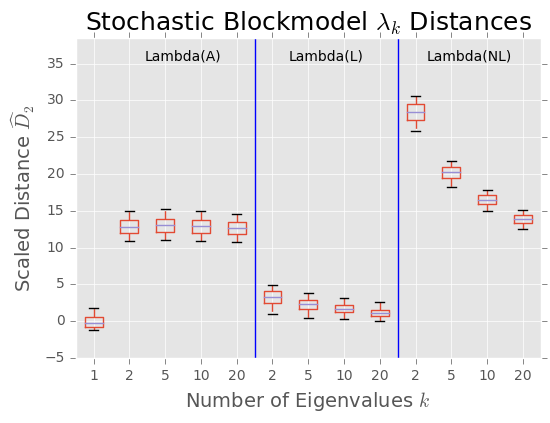

In [33]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l2.p'
title = 'Stochastic Blockmodel $\lambda_k$ Distances'
filename = 'sbm_k.pdf'
k_list = [1,2,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

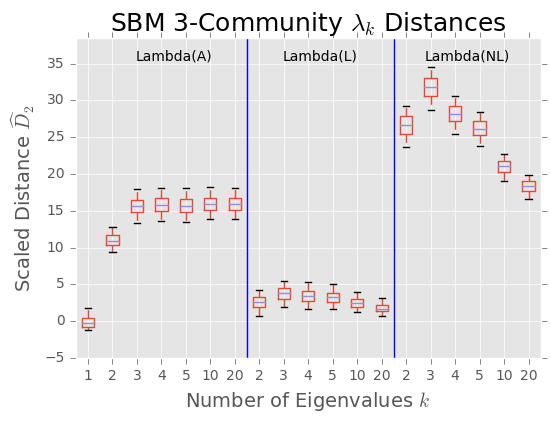

In [32]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l3.p'
title = 'SBM 3-Community $\lambda_k$ Distances'
filename = 'sbm_3_k.pdf'
k_list = [1,2,3,4,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

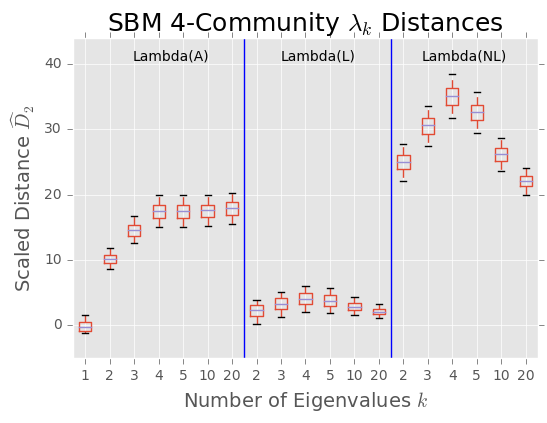

In [31]:
path = 'pickled_data/SBM_vs_uncorr_lambda_k_l4.p'
title = 'SBM 4-Community $\lambda_k$ Distances'
filename = 'sbm_4_k.pdf'
k_list = [1,2,3,4,5,10,20]

plot_lambda_k(path,k_list,title=title,scale=1.1,save=True,filename=filename)

## Preferential Attachment

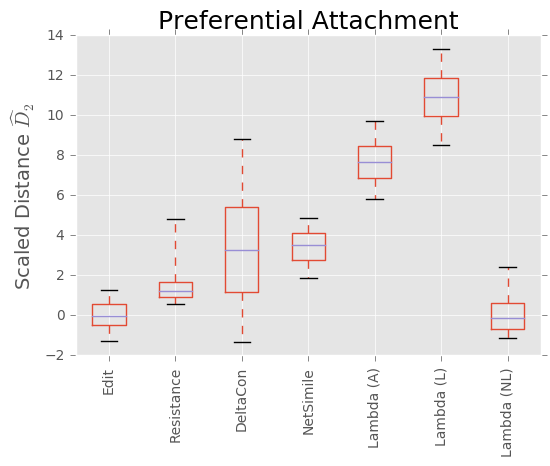

In [6]:
data_dict = pd.read_pickle('pickled_data/er_to_ba_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Preferential Attachment');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att.pdf'),dpi=300,bbox_inches='tight');

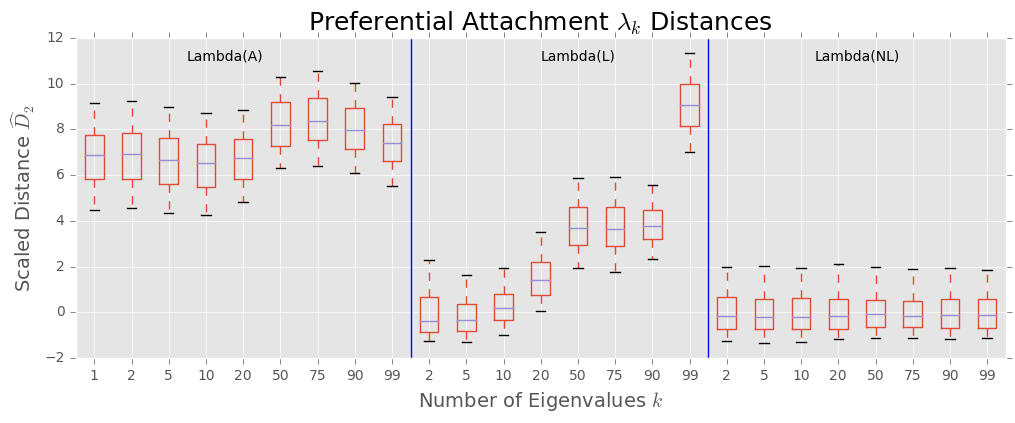

In [73]:
# data for small k

data_dict = pd.read_pickle('pickled_data/er_to_ba_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

# data for big k

data_dict = pd.read_pickle('pickled_data/er_to_ba_bigk.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])
    

# UNITE THEM

adj_scaled_2 = (adj_not - adj_null.mean())/adj_null.std()
adj_scaled = pd.concat([adj_scaled,adj_scaled_2],axis=1)

N = adj_scaled.shape[1]

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]

for col in ['Lambda (Laplacian, k=1)','Lambda (Normalized Laplacian, k=1)']:
    del adj_scaled[col]

big_num_labels = [1,2,5,10,20,50,75,90,99] + [2,5,10,20,50,75,90,99]*2

plt.figure(figsize=(12,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);
plt.title('Preferential Attachment $\lambda_k$ Distances');
plt.axvline(9.5);
plt.axvline(17.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(4.5,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(14,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(21.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'pref_att_k.pdf'),dpi=300,bbox_inches='tight');

# Pref Attachment vs Random Degree Distribution

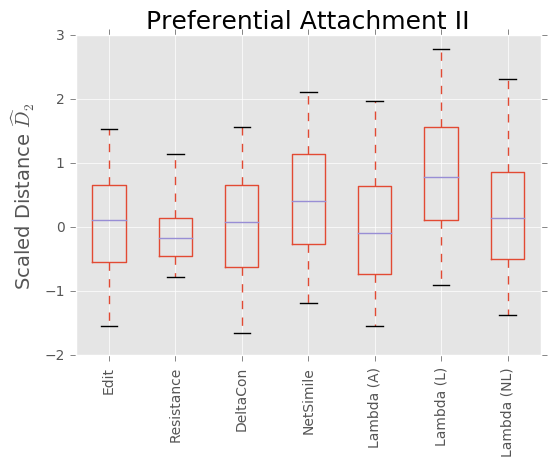

In [4]:
data_dict = pd.read_pickle('pickled_data/degmatched_PA.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Preferential Attachment II');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'degmatched_pa.pdf'),dpi=300,bbox_inches='tight');

# Small World

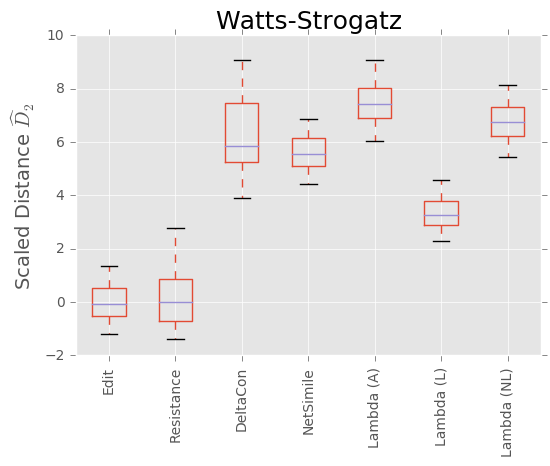

In [40]:
data_dict = pd.read_pickle('pickled_data/small_world_ER_corr.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Watts-Strogatz');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'small_world.pdf'),dpi=300,bbox_inches='tight');

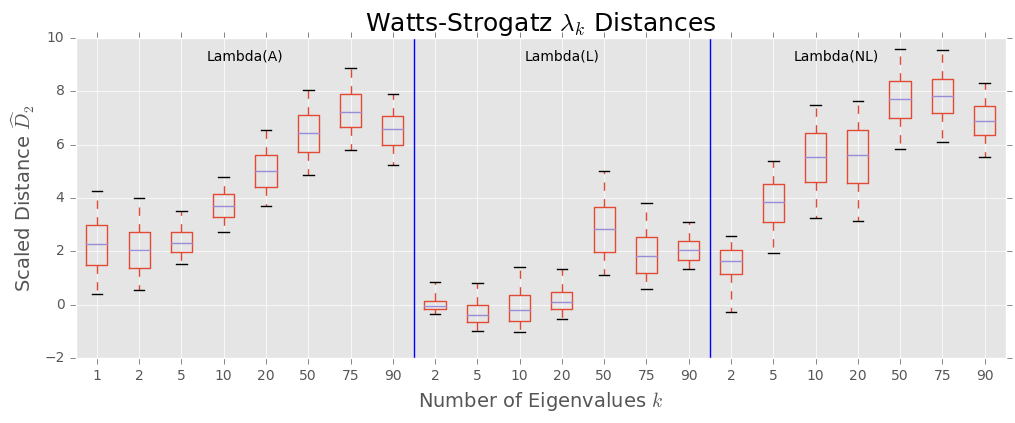

In [39]:
# data for small k

data_dict = pd.read_pickle('pickled_data/small_world_ER_lambda_k.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

# data for big k

data_dict = pd.read_pickle('pickled_data/small_world_ER_lambda_k_bigk.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])
    
# UNITE THEM

adj_scaled_2 = (adj_not - adj_null.mean())/adj_null.std()
adj_scaled = pd.concat([adj_scaled,adj_scaled_2],axis=1)

# and get rid of the ones we don't want

cols_of_interest = ['Adj. k = 1', 'Adj. k = 2', 'Adj. k = 5',
       'Adj. k = 10', 'Adj. k = 20', 'Adj. k = 50', 'Adj. k = 75',
       'Adj. k = 90', 'Lap. k = 2',
       'Lap. k = 5', 'Lap. k = 10', 'Lap. k = 20', 'Lap. k = 50',
       'Lap. k = 75', 'Lap. k = 90', 'N. Lap. k = 2',
       'N. Lap. k = 5', 'N. Lap. k = 10',
       'N. Lap. k = 20', 'N. Lap. k = 50', 'N. Lap. k = 75', 'N. Lap. k = 90']

N = adj_scaled.shape[1]

indices = list(range(0,N,3)) + list(range(1,N,3)) + list(range(2,N,3))
adj_scaled = adj_scaled.iloc[:,indices]
adj_scaled = adj_scaled[cols_of_interest]

big_num_labels = [1,2,5,10,20,50,75,90] + [2,5,10,20,50,75,90]*2

plt.figure(figsize=(12,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xlabel('Number of Eigenvalues $k$')
plt.xticks(range(1,len(big_num_labels)+1),big_num_labels);
plt.title('Watts-Strogatz $\lambda_k$ Distances');
plt.axvline(8.5);
plt.axvline(15.5);

axes = plt.gca()
y_min,y_max = axes.get_ylim()
y_ran = y_max - y_min
shift = -0.07

plt.text(4.5,y_max + shift*y_ran,'Lambda(A)',horizontalalignment='center')
plt.text(12,y_max + shift*y_ran,'Lambda(L)',horizontalalignment='center')
plt.text(18.5,y_max + shift*y_ran,'Lambda(NL)',horizontalalignment='center')

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'small_world_k.pdf'),dpi=300,bbox_inches='tight');

# Lattics vs Random Degree-Distr Graph

In [51]:
data_dict = pd.read_pickle('pickled_data/lattice_dist.p')

adj_null = data_dict['results_df_null']['Adjacency Distances'].T
adj_not = data_dict['results_df_not_null']['Adjacency Distances'].T

for item in [adj_null,adj_not]:
    item.index = range(item.shape[0])

adj_scaled = (adj_not - adj_null.mean())/adj_null.std()

plt.figure(figsize=(6,4))
adj_scaled.boxplot(**kwargs);
plt.ylabel('Scaled Distance $\widehat{D}_2$');
plt.xticks(range(1,len(labels)+1),labels,rotation=90);
plt.title('Lattice Graph (10x10)');

if save_figs:
    fig = plt.gcf();
    fig.savefig(os.path.join(figures_dir,'lattice.pdf'),dpi=300,bbox_inches='tight');

FileNotFoundError: [Errno 2] No such file or directory: 'pickled_data/lattice_dist.p'

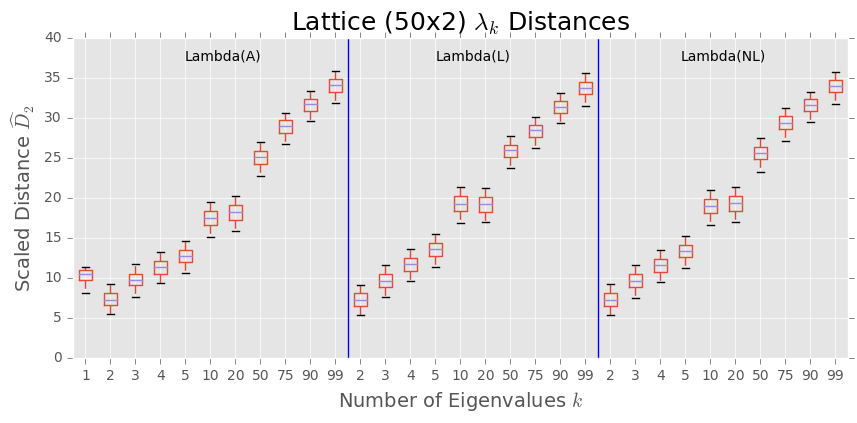

In [50]:
path = 'pickled_data/lattice_vs_randDS_lambda_k.p'
title = 'Lattice (50x2) $\lambda_k$ Distances'
filename = 'lattice_skinny_k.pdf'
k_list = [1,2,3,4,5,10,20,50,75,90,99]

plot_lambda_k(path,k_list,title=title,figsize=(10,4),save=True,filename=filename,y_lim=[0,40])

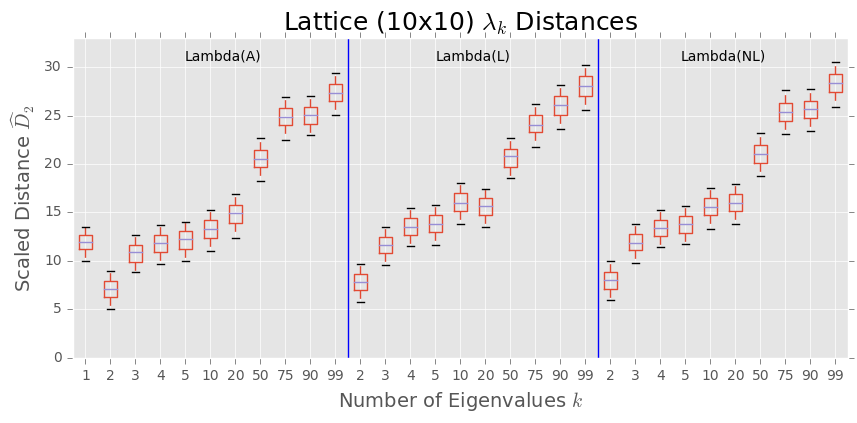

In [48]:
path = 'pickled_data/lattice_vs_randDS_lambda_k_01.p'
title = 'Lattice (10x10) $\lambda_k$ Distances'
filename = 'lattice_k.pdf'
k_list = [1,2,3,4,5,10,20,50,75,90,99]

plot_lambda_k(path,k_list,title=title,figsize=(10,4),save=True,filename=filename,y_lim = [0,33])